## About The Case Study



## Case Study
## Symptoms of Specific Cancer Types

As per the American Cancer Society (ACS) Trusted Source, a primary indication of breast cancer is the presence of a new lump or mass in the breast. It is crucial for individuals to become familiar with the typical appearance and feel of their breasts to identify any changes at an early stage.

While breast cancer can occur in both males and females, it is significantly less common in males due to differences Trusted Source in breast tissue.

Outlined below are early signs of breast cancer, along with an exploration of different types of breast cancer and available treatment options. Additionally, we delve into various benign conditions that may be mistaken for breast cancer.

### Benign Breast Conditions
Several benign breast conditions can exhibit symptoms similar to those of cancer. While some of these conditions require treatment, others resolve on their own.

Although these conditions are non-cancerous, they may cause:

- Discomfort or pain
- Swelling
- Formation of lumps

Some common benign breast conditions include:

- **Cysts:** Fluid-filled sacs that can form in various parts of the body, including the breasts.
- **Mastitis:** Inflammation (swelling) of the breast, often caused by an infection.
- **Hyperplasia:** Overgrowth of cells, particularly in the milk ducts or lobules within the breast.
- **Sclerosing adenosis:** Enlargement of lobules.
- **Intraductal papillomas:** Benign wart-like tumors that develop within the milk ducts of the breast.
- **Fibroadenoma:** Common breast tumors that occur due to the overgrowth of fibrous or glandular tissue around a lobule.
- **Radial scar:** Also known as complex sclerosing lesions, these are cores of connective tissue that may resemble breast cancer on a mammogram.
- **Fat necrosis:** Occurs following an injury to fatty breast tissue, which can result from surgery, radiation, or trauma to the breast.
- **Phyllodes tumors:** Fast-growing, usually painless tumors originating in the connective tissue of the breast. Some may be cancerous.

![Breast Cancer Symptoms](https://i0.wp.com/cytecare.com/wp-content/uploads/2020/10/signs-of-breast-cancer.jpg?resize=1152%2C1536&ssl=1)

## Procedure
In this kernel, we employ multiple classification algorithms, including:

- Multi-layer Perceptron classifier (MLP)
- KNeighborsClassifier
- AdaBoostClassifier
- BaggingClassifier
- GradientBoostingClassifier
- RandomForestClassifier

Furthermore, this kernel conducts comprehensive exploratory data analysis (EDA), encompassing:

- Univariate analysis
- Bivariate analysis
- Correlation analysis

For evaluating the accuracy of the models, this kernel utilizes the following methods:

- AUC (Area Under the Curve)
- Classification report
- Confusion matrix

## General Library Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warning messages for cleaner output

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Import necessary libraries for models

from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)  # Ensemble classifiers

# Import metrics evaluation libraries
from sklearn.metrics import (
    auc,
    classification_report,
    confusion_matrix,
    roc_curve,
    RocCurveDisplay,
)


## Data loading

In [2]:
project_data = pd.read_csv("data.csv")
project_data = project_data.drop(columns=["id"]) # droping unwanted columns

## Initial Analysis

In [3]:
project_data.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
project_data.describe()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
project_data.shape

(569, 31)

In [7]:
project_data.columns

Index(['diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Null Value Analysis

In [8]:
project_data.isna().sum()

diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Eploratory Data Analysis

B    357
M    212
Name: diagnosis, dtype: int64


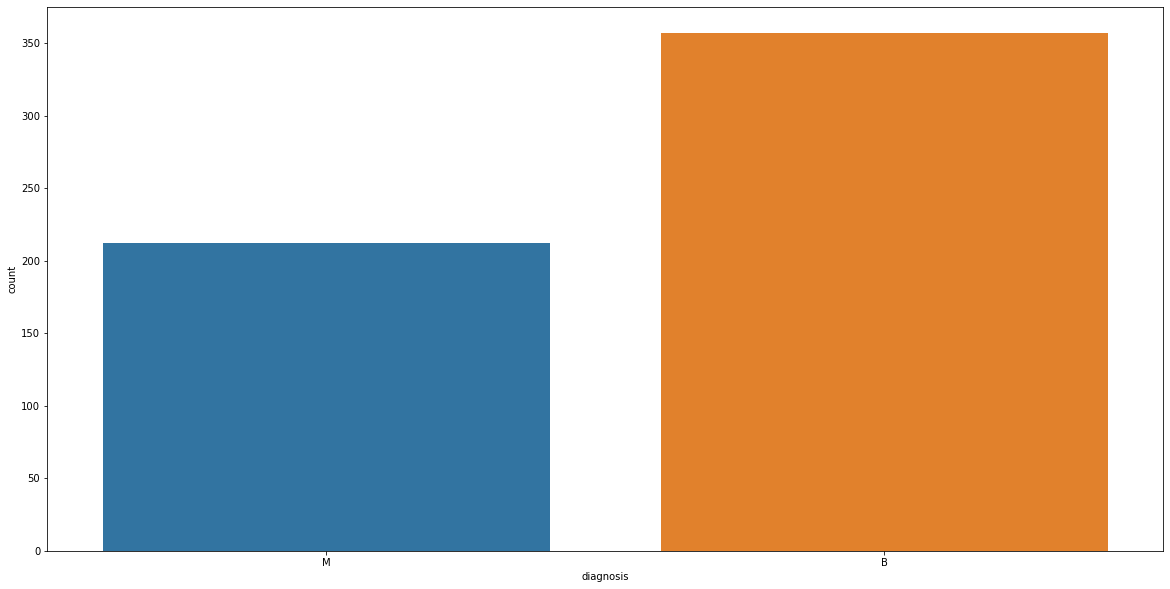

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x=project_data["diagnosis"])
print(project_data["diagnosis"].value_counts())

In [10]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'float64']
print(numeric_columns)

['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


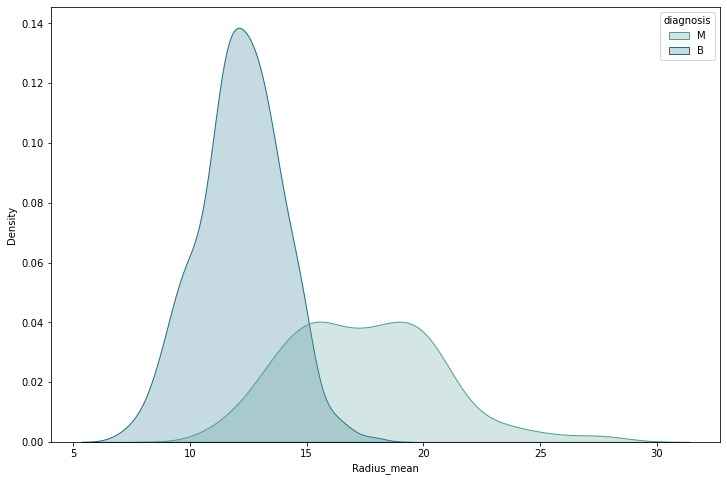

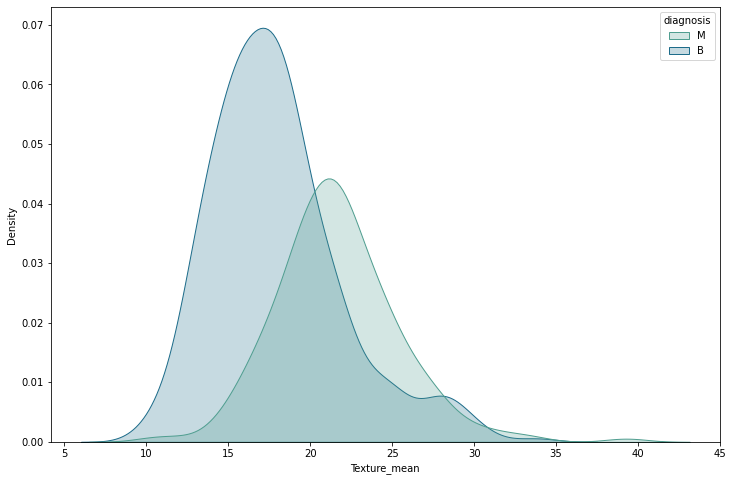

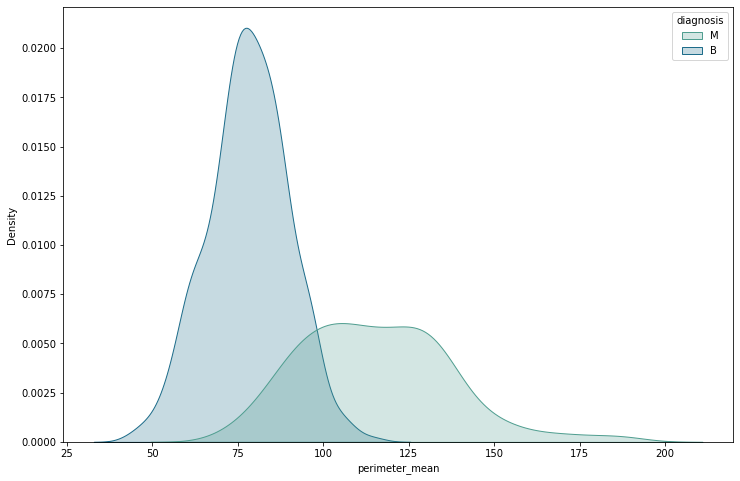

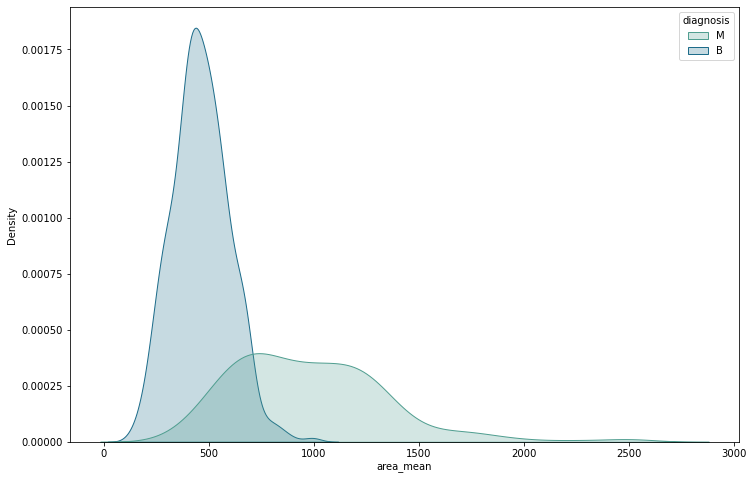

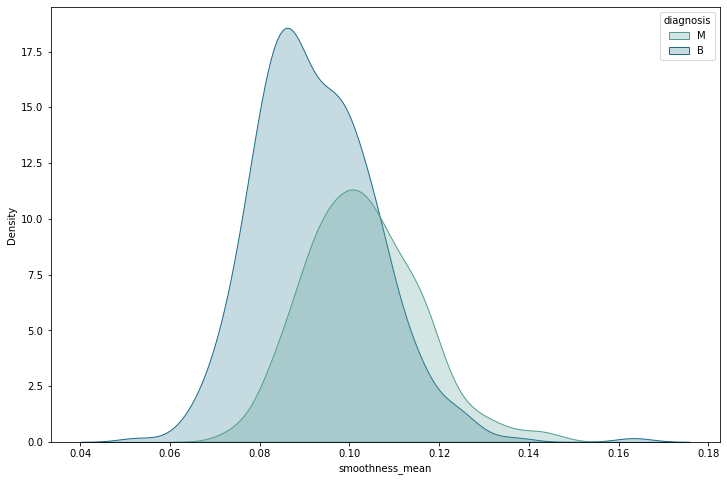

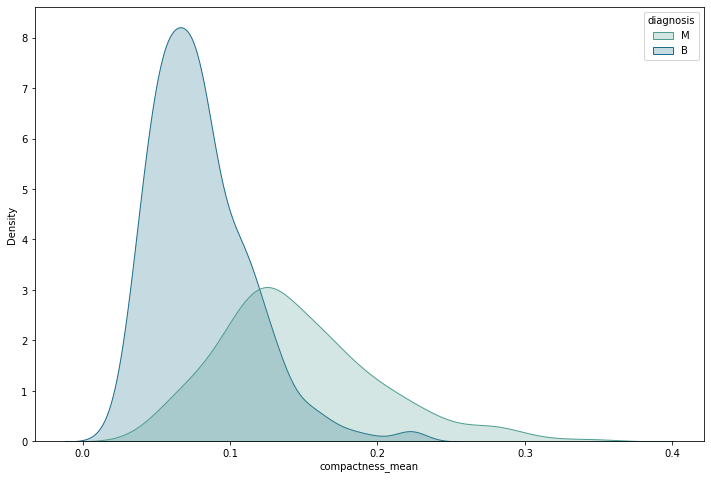

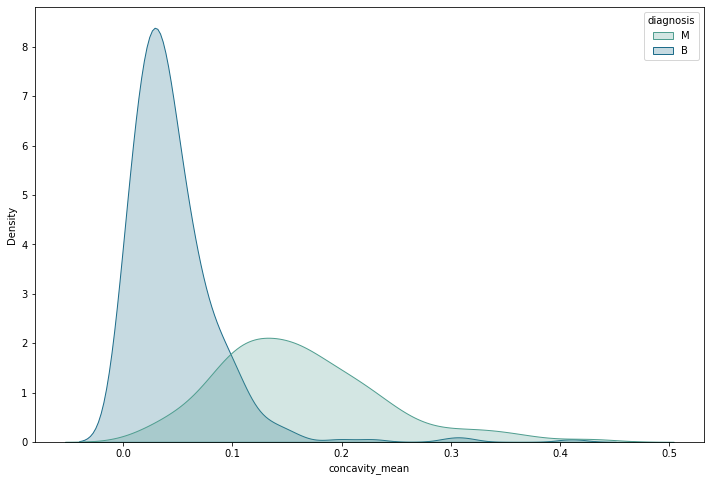

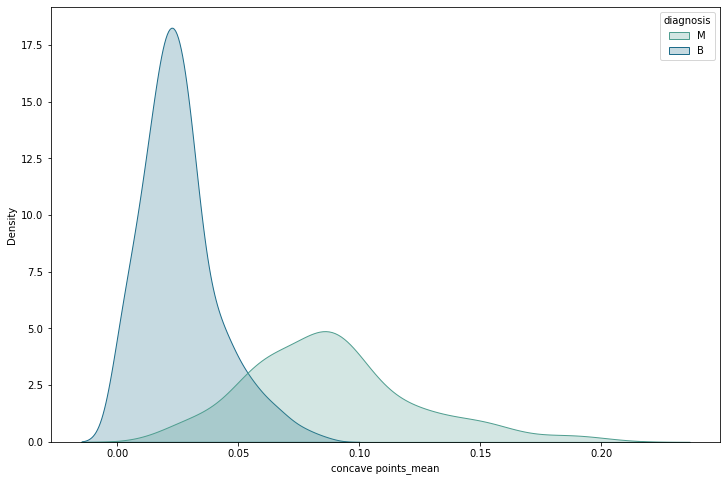

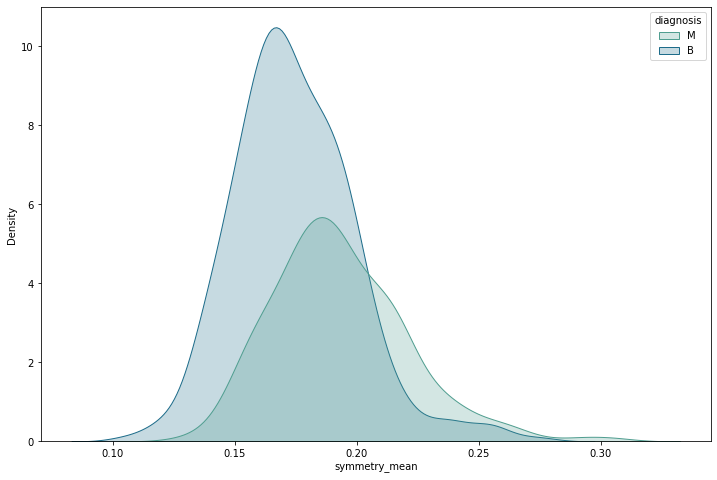

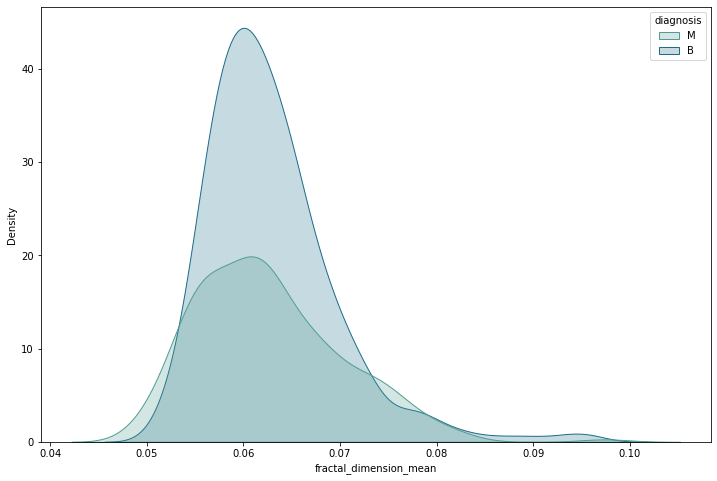

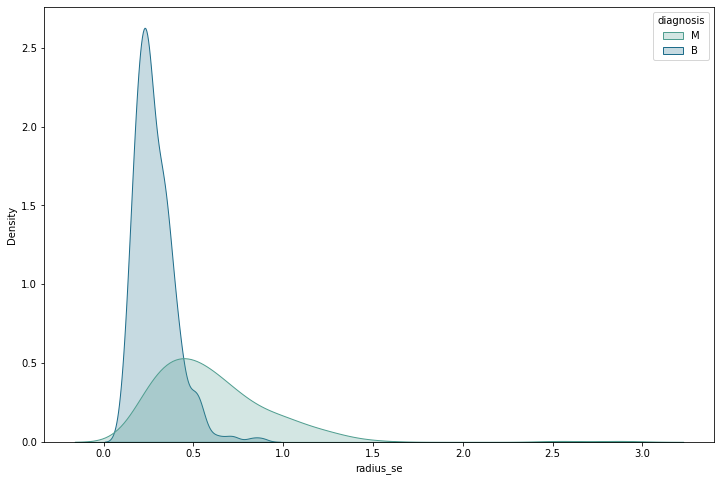

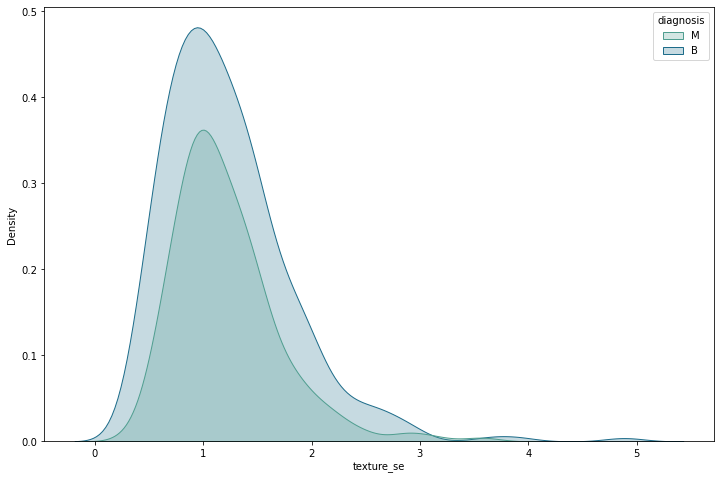

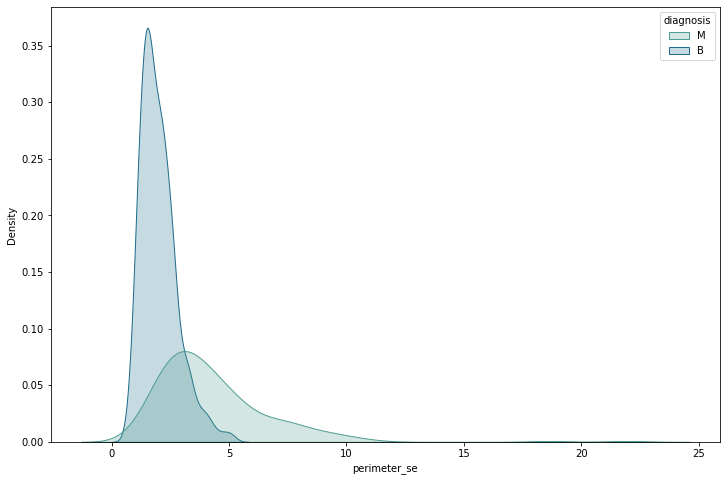

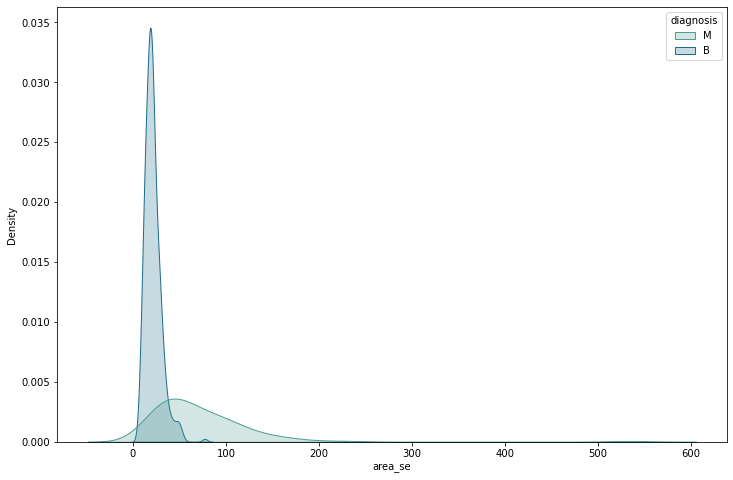

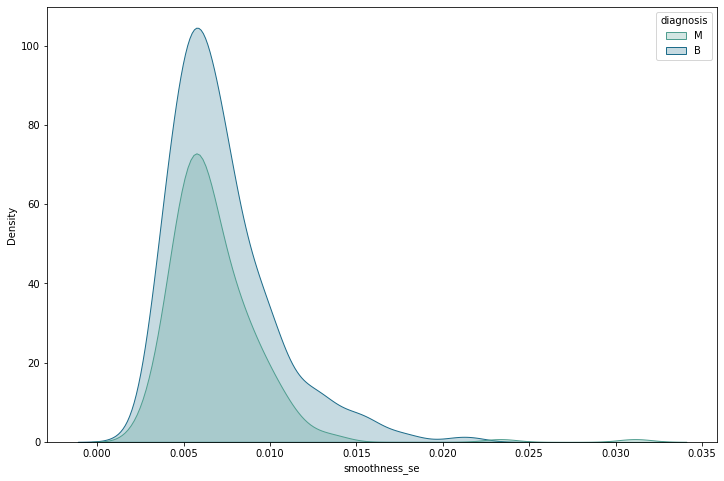

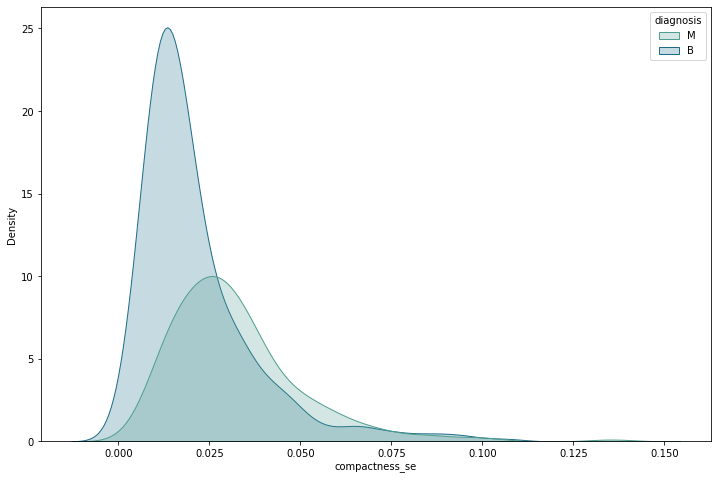

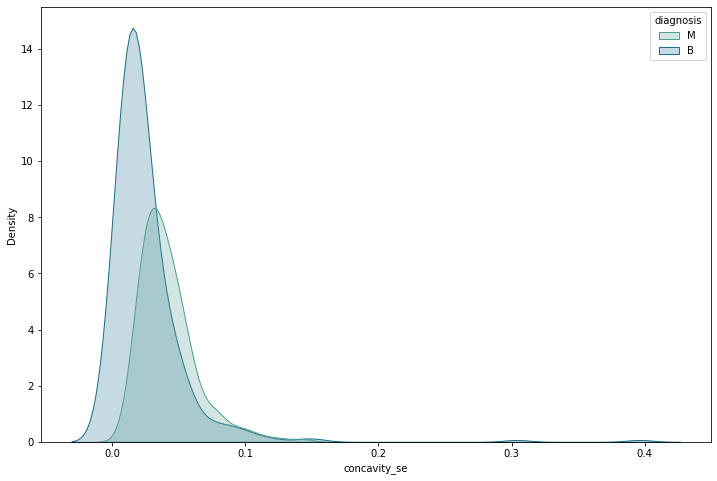

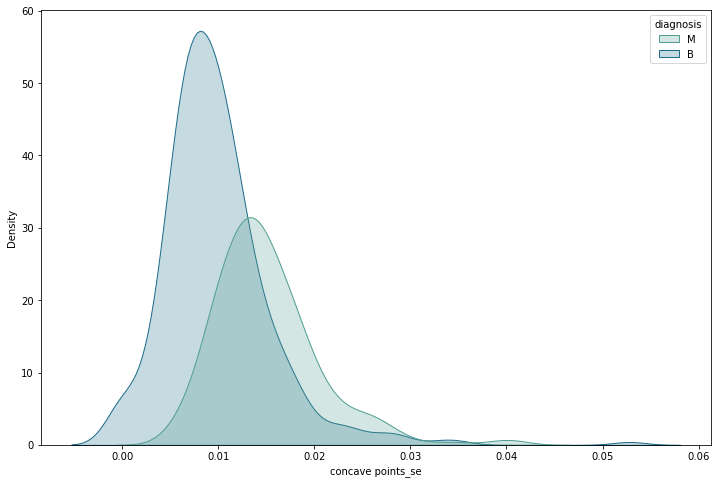

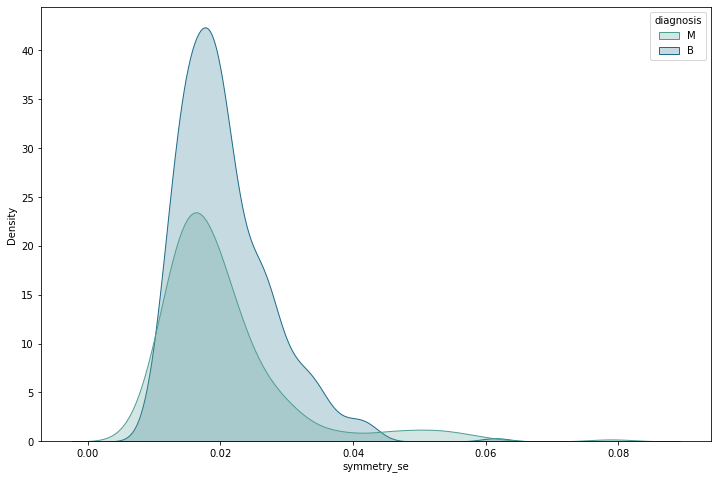

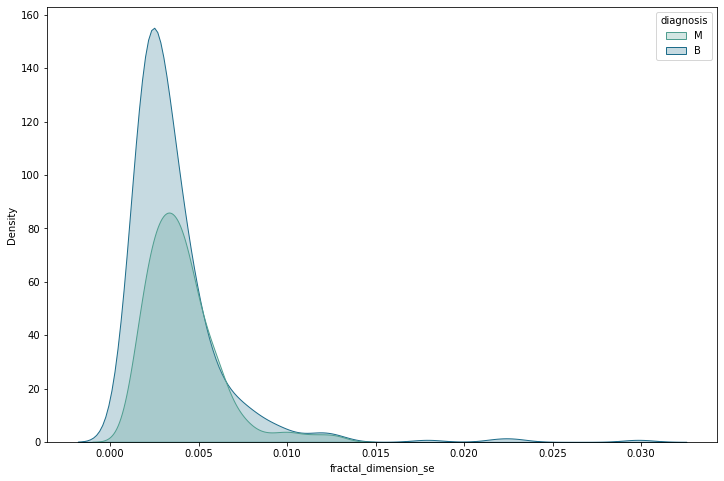

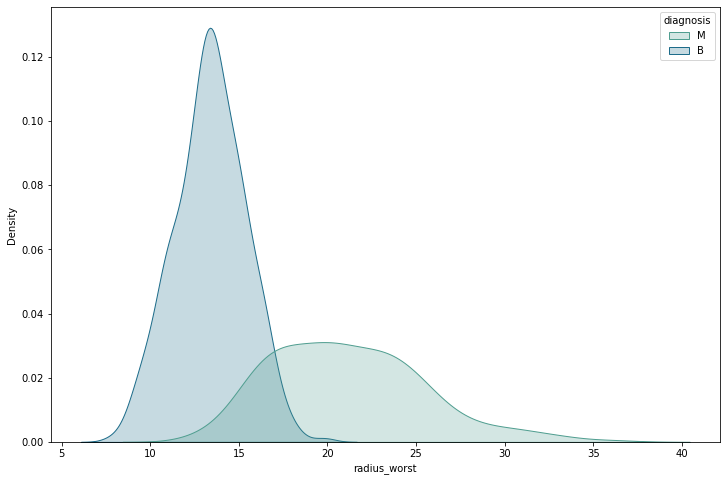

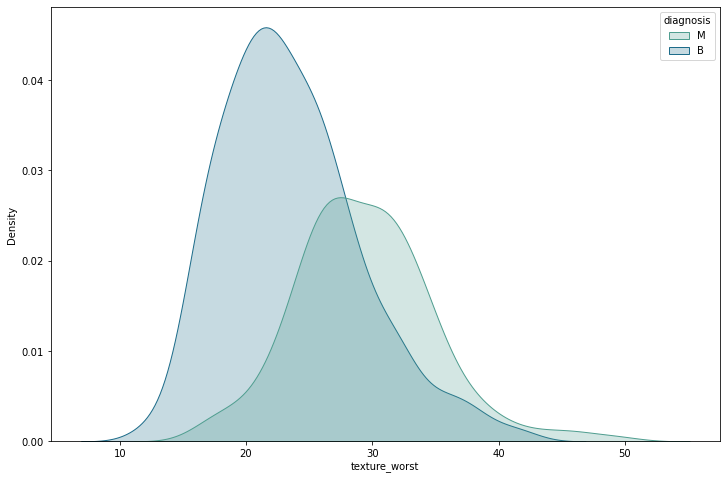

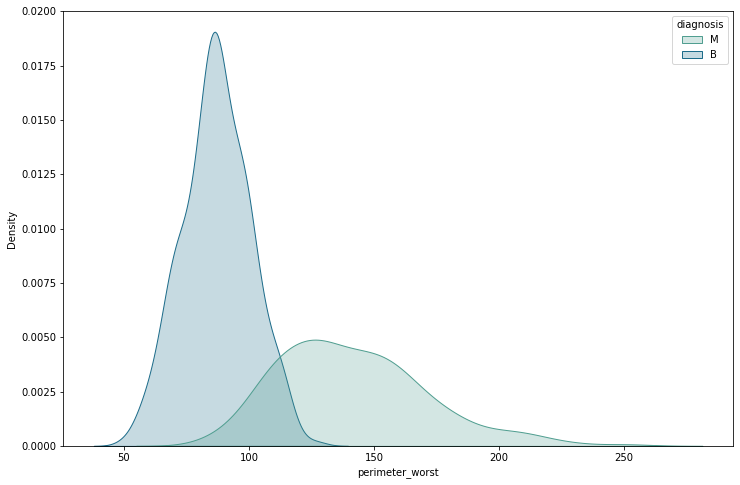

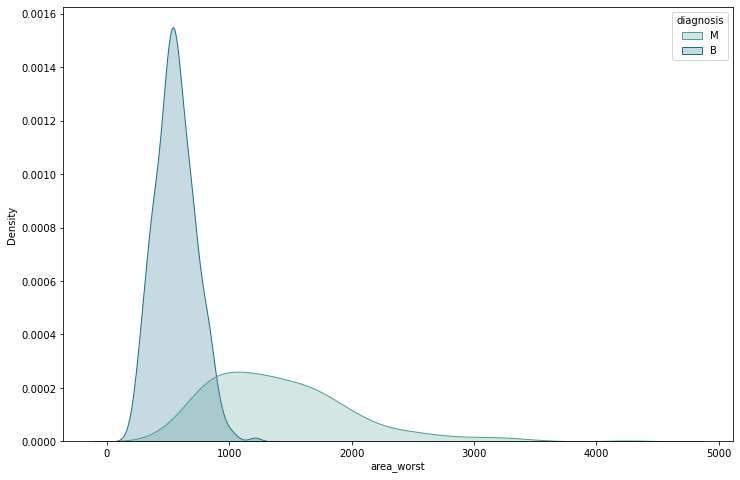

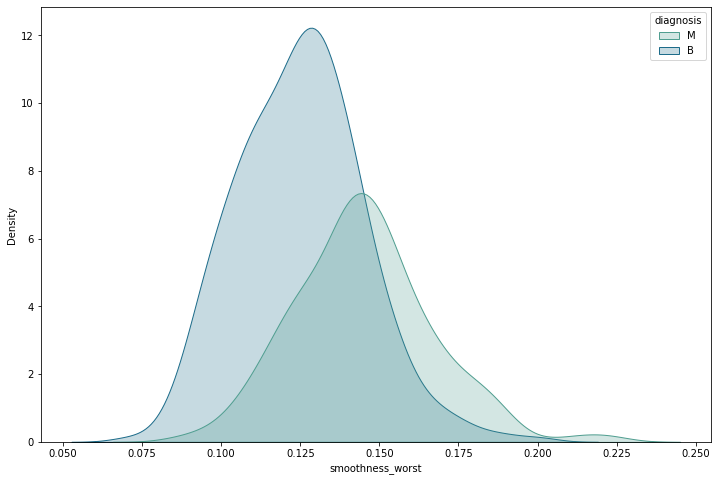

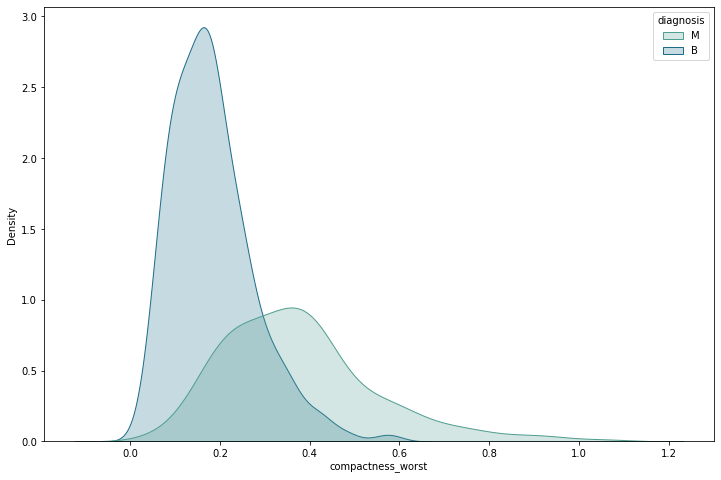

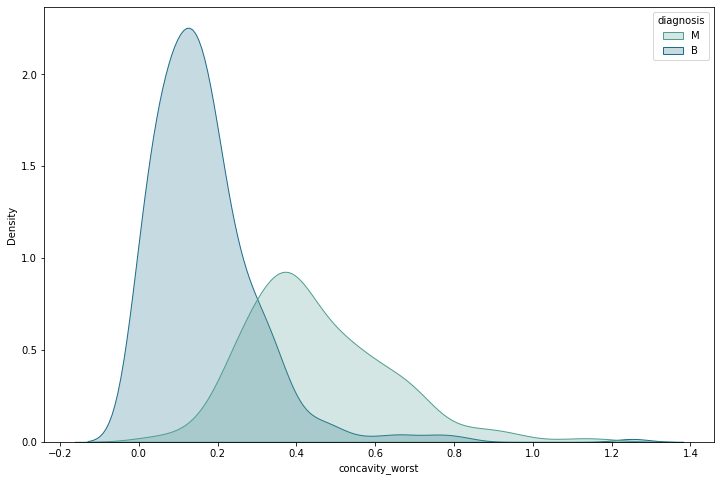

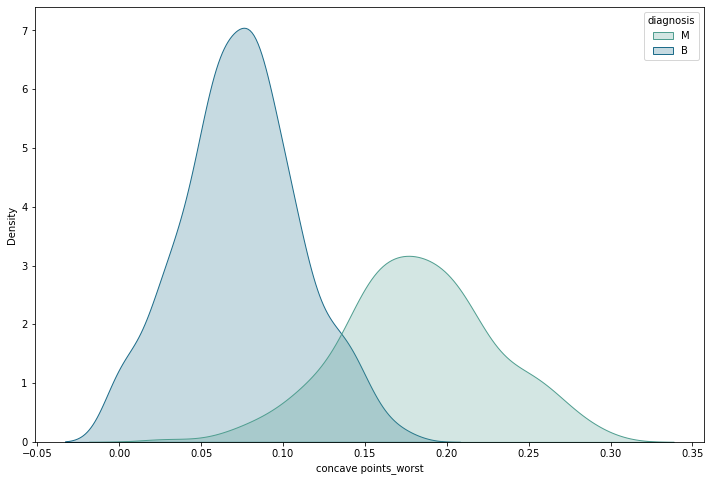

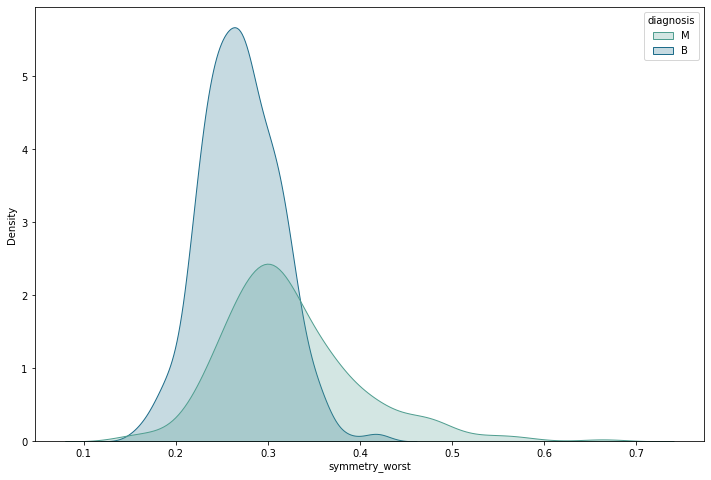

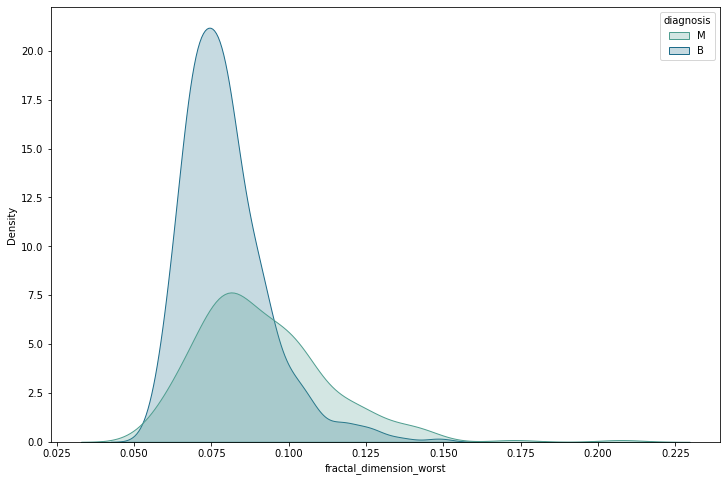

In [11]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))  # Set the size of the figure for better visualization
    sns.kdeplot(data=project_data, x=column, hue='diagnosis', palette="crest", fill=True)  # Generate a KDE plot
    plt.show()  # Display the plot


## Correlation Analysis

<AxesSubplot:>

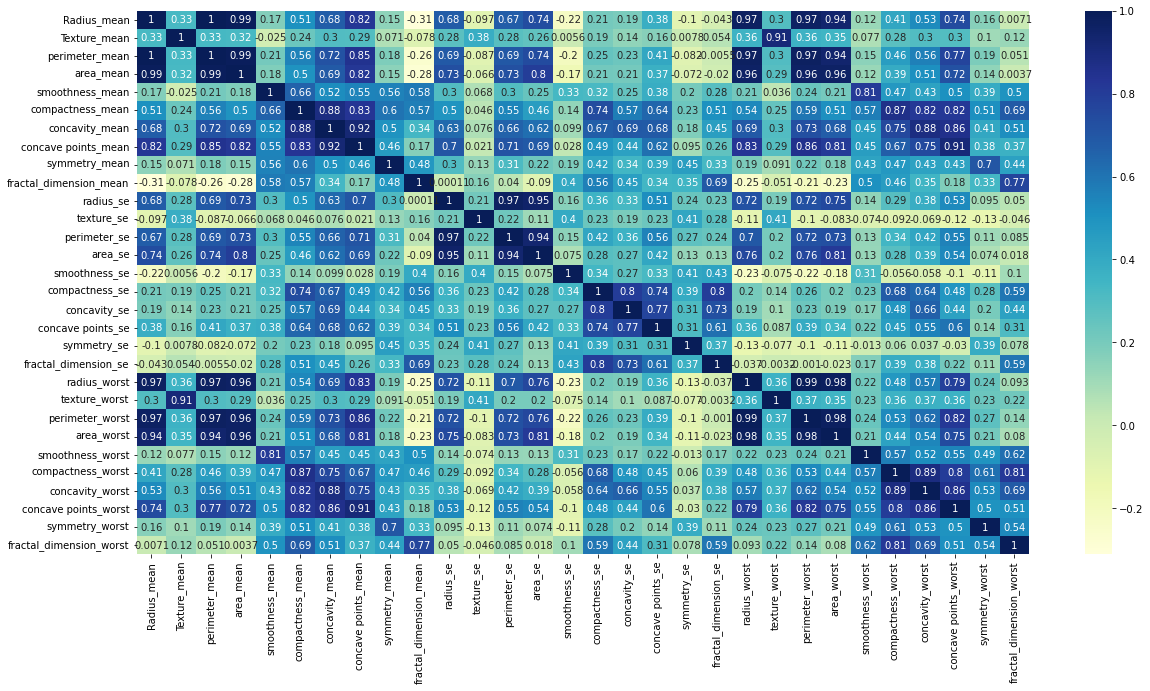

In [12]:
plt.figure(figsize=(20,10))  # Set the size of the figure for better visualization
corr = project_data.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap="YlGnBu")  # Generate a heatmap with correlation values annotated

## Data Preprocessing and Pipelining

In [13]:
X_train = project_data.drop(columns=["diagnosis"])  # Assign the features to X_train by dropping the "diagnosis" column
y_train = project_data["diagnosis"]  # Assign the target variable to y_train

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [14]:
print('Train dataset shape:', X_train.shape)  # Print the shape of the training dataset
print('Test dataset shape:', y_train.shape)  # Print the shape of the training target variable

Train dataset shape: (455, 30)
Test dataset shape: (455,)


In [15]:
numeric_columns = X_train.select_dtypes(exclude='object').columns  # Get the column names of numeric features
print(numeric_columns)  # Print the column names of numeric features
print('*'*100)  # Print a separator line
categorical_columns = X_train.select_dtypes(include='object').columns  # Get the column names of categorical features
print(categorical_columns)  # Print the column names of categorical features

Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


In [16]:
numeric_features = Pipeline([
    ('handlingmissingvalues', SimpleImputer(strategy='median')),  # Handle missing values using median imputation
    ('scaling', StandardScaler(with_mean=True))  # Scale the numeric features
])

print(numeric_features)  # Print the numeric features pipeline
print('*'*100)  # Print a separator line

categorical_features = Pipeline([
    ('handlingmissingvalues', SimpleImputer(strategy='most_frequent')),  # Handle missing values using most frequent imputation
    ('encoding', OneHotEncoder()),  # Perform one-hot encoding on categorical features
    ('scaling', StandardScaler(with_mean=False))  # Scale the categorical features
])

print(categorical_features)  # Print the categorical features pipeline

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),  # Apply the numeric features pipeline to numeric columns
    ('categorical', categorical_features, categorical_columns)  # Apply the categorical features pipeline to categorical columns
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImpute

## Generic Methods for Model Preparation & Metric Evaliation

In [17]:
def prepare_model(algorithm):
    """
    Prepare a model pipeline for training and return the trained model.

    Parameters:
    - algorithm: The algorithm/model to be used for modeling.

    Returns:
    - model: The prepared and trained model.

    """

    model = Pipeline(steps=[
        ('processing', processing),  # Apply the data processing steps
        ('pca', TruncatedSVD(n_components=3, random_state=12)),  # Perform dimensionality reduction using TruncatedSVD
        ('modeling', algorithm)  # Use the specified algorithm/model for modeling
    ])

    model.fit(X_train, y_train)  # Fit the model on the training data

    return model

In [18]:
def prepare_confusion_matrix(algo, model):
    """
    Prepare and display the confusion matrix for a trained model.

    Parameters:
    - algo: The name or description of the algorithm/model.
    - model: The trained model.

    """

    print(algo)  # Print the name or description of the algorithm/model

    plt.figure(figsize=(12, 8))  # Set the size of the plot

    pred = model.predict(X_test)  # Generate predictions on the test data
    cm = confusion_matrix(y_test, pred)  # Calculate the confusion matrix

    ax = plt.subplot()  # Create a subplot for the heatmap
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)  # Plot the confusion matrix as a heatmap
    plt.show()  # Display the plot

    # Set labels, title, and ticks for the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

In [19]:
def prepare_classification_report(algo, model):
    """
    Prepare and display the classification report for a trained model.

    Parameters:
    - algo: The name or description of the algorithm/model.
    - model: The trained model.

    """

    print(algo + ' Report:')  # Print the name or description of the algorithm/model

    pred = model.predict(X_test)  # Generate predictions on the test data
    print(classification_report(y_test, pred))  # Print the classification report


In [20]:
def prepare_roc_curve(algo, model):
    """
    Prepare and display the ROC curve for a trained model.

    Parameters:
    - algo: The name or description of the algorithm/model.
    - model: The trained model.

    """

    print(algo)  # Print the name or description of the algorithm/model

    y_pred_proba = model.predict_proba(X_test)[::, 1]  # Get the predicted probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Calculate the ROC curve values
    roc_auc = auc(fpr, tpr)  # Calculate the Area Under the ROC Curve (AUC)

    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)  # Create the ROC curve display object
    curve.plot()  # Plot the ROC curve
    plt.show()  # Display the plot


## Model Preparation

In [21]:
algorithms = [('Bagging Classifier', BaggingClassifier()),
              ('KNN Classifier', KNeighborsClassifier()),
              ('Random Forest Classifier', RandomForestClassifier()),
              ('AdaBoost Classifier', AdaBoostClassifier()),
              ('Gradient Boost Classifier', GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    """
    Iterate over the algorithms list, prepare the model, and store the trained models and scores.

    Parameters:
    - index: The index of the algorithm/model in the list.
    - tup: A tuple containing the name/description and the algorithm/model itself.

    """

    model = prepare_model(tup[1])  # Prepare the model using the specified algorithm
    model_and_score[tup[0]] = str(model.score(X_train, y_train) * 100) + "%"  # Store the model's score
    trained_models.append((tup[0], model))  # Store the name/description and the trained model


## Model Evaluation

In [22]:
print(model_and_score)

{'Bagging Classifier': '98.9010989010989%', 'KNN Classifier': '96.7032967032967%', 'Random Forest Classifier': '100.0%', 'AdaBoost Classifier': '100.0%', 'Gradient Boost Classifier': '100.0%', 'MLP': '96.7032967032967%'}


Bagging Classifier


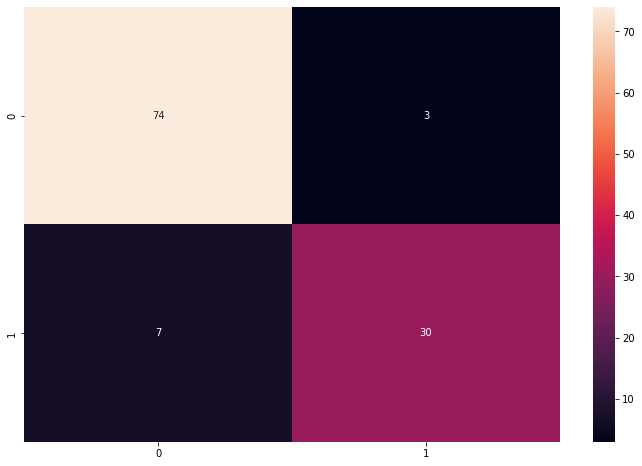

KNN Classifier


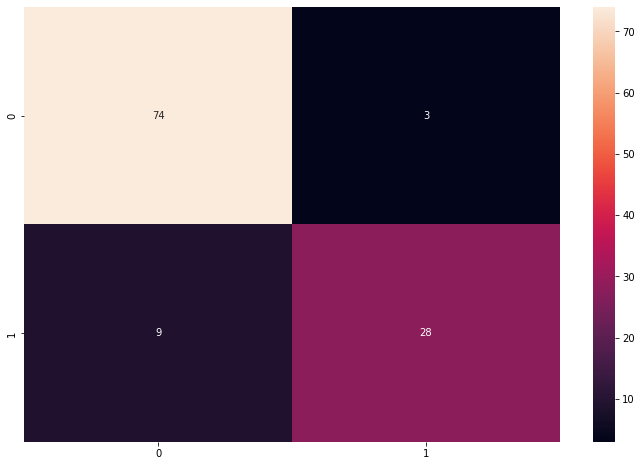

Random Forest Classifier


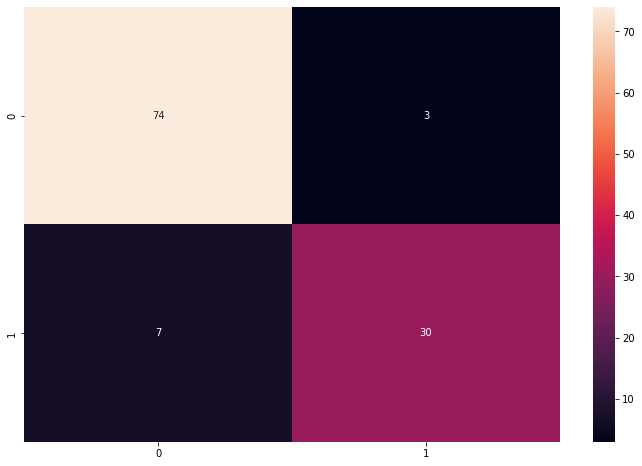

AdaBoost Classifier


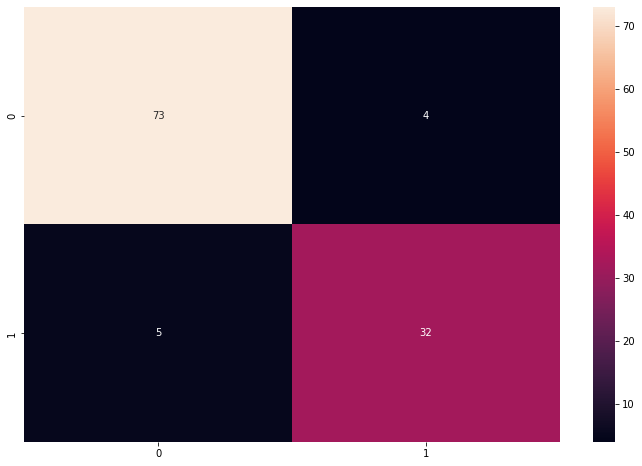

Gradient Boost Classifier


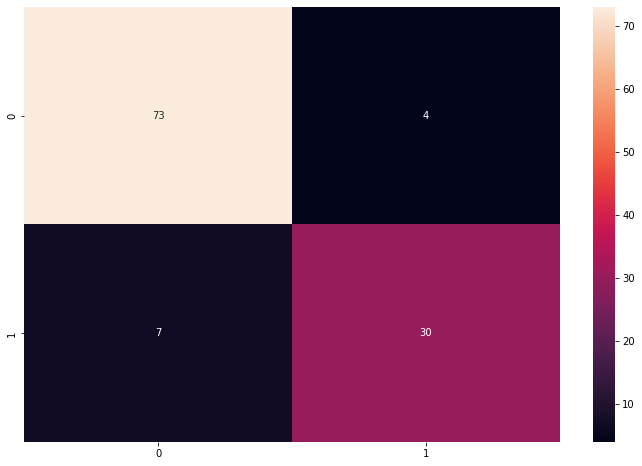

MLP


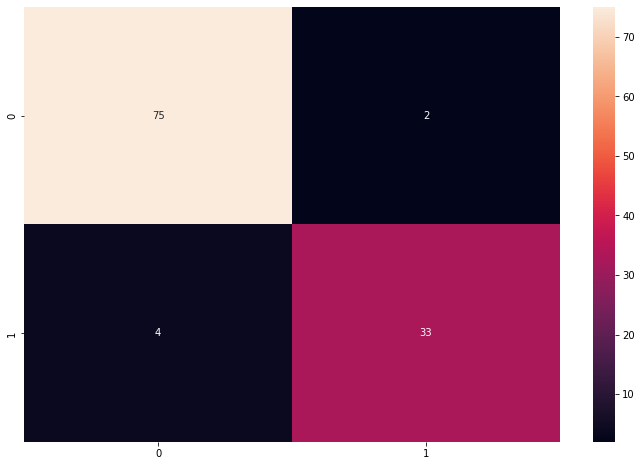

In [23]:
for index, tup in enumerate(trained_models):
    """
    Iterate over the trained models and prepare and display the confusion matrix for each model.

    Parameters:
    - index: The index of the model in the trained_models list.
    - tup: A tuple containing the name/description and the trained model itself.

    """

    prepare_confusion_matrix(tup[0], tup[1])  # Call the prepare_confusion_matrix function for each model


In [24]:
for index, tup in enumerate(trained_models):
    """
    Iterate over the trained models and prepare and display the classification report for each model.

    Parameters:
    - index: The index of the model in the trained_models list.
    - tup: A tuple containing the name/description and the trained model itself.

    """

    prepare_classification_report(tup[0], tup[1])  # Call the prepare_classification_report function for each model
    print("\n")


Bagging Classifier Report:
              precision    recall  f1-score   support

           B       0.91      0.96      0.94        77
           M       0.91      0.81      0.86        37

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



KNN Classifier Report:
              precision    recall  f1-score   support

           B       0.89      0.96      0.92        77
           M       0.90      0.76      0.82        37

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.90      0.89      0.89       114



Random Forest Classifier Report:
              precision    recall  f1-score   support

           B       0.91      0.96      0.94        77
           M       0.91      0.81      0.86        37

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.

Bagging Classifier


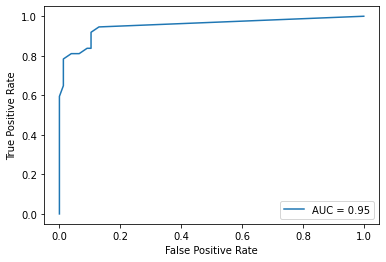

KNN Classifier


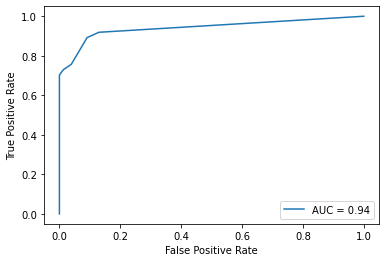

Random Forest Classifier


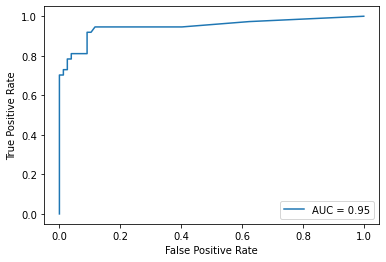

AdaBoost Classifier


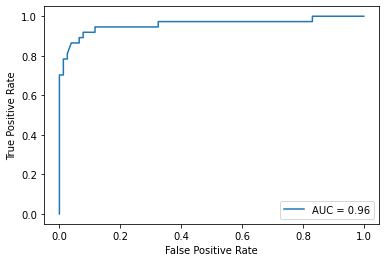

Gradient Boost Classifier


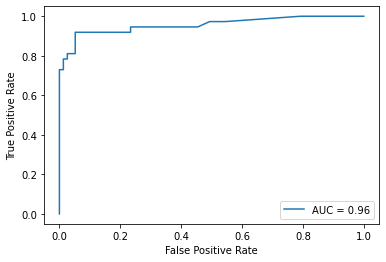

MLP


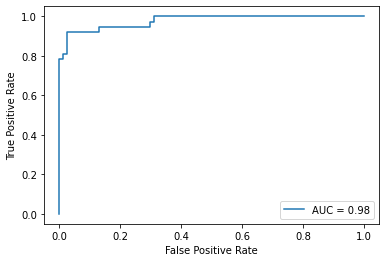

In [25]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    """
    Iterate over the trained models and prepare and display the ROC curve for each model.

    Parameters:
    - index: The index of the model in the trained_models list.
    - tup: A tuple containing the name/description and the trained model itself.

    """

    prepare_roc_curve(tup[0], tup[1])  # Call the prepare_roc_curve function for each model


## Summary Of the Analysis

In [26]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train Accuracy", "AUC SCORE"])
x.add_row(["bagging classifier","99.56","0.97"])
x.add_row(["KNN classifier","95.82","0.97"])
x.add_row(["Random Forest calssifier","100","0.97"])
x.add_row(["Adaboost classifier","100","0.96"])
x.add_row(["Gradientboot classifier","100","0.97"])
x.add_row(["MLP Classifier","96.92","0.98"])
print(x)

+--------------------------+----------------+-----------+
|          Model           | Train Accuracy | AUC SCORE |
+--------------------------+----------------+-----------+
|    bagging classifier    |     99.56      |    0.97   |
|      KNN classifier      |     95.82      |    0.97   |
| Random Forest calssifier |      100       |    0.97   |
|   Adaboost classifier    |      100       |    0.96   |
| Gradientboot classifier  |      100       |    0.97   |
|      MLP Classifier      |     96.92      |    0.98   |
+--------------------------+----------------+-----------+


* On the whole we select the algorithm that is have good AUC score and training accuracy
    Gradientboot classifier, Random Forest calssifier

Credits:
* https://www.medicalnewstoday.com/articles/327488#symptoms
* https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470